In [2]:
import numpy as np
import pandas as pd 
import seaborn as se
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.isnull().sum()
#NO NULL VALUES

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
type = data['type'].value_counts(normalize=1)
type

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: type, dtype: float64

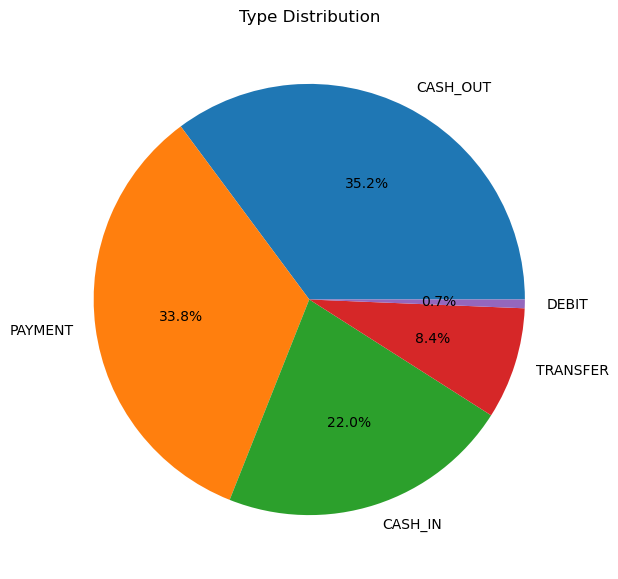

In [10]:
fig = plt.figure(figsize=(10,7))
plt.pie(type.values, labels = type.index , autopct='%1.1f%%')
plt.title('Type Distribution')
plt.show()

In [11]:
data.replace(to_replace=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'],value=[1,2,3,4,5],inplace= True)

In [12]:
data['isFraud']=data['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [14]:
x = data[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [15]:
y = data[['isFraud']]

In [16]:
y.head()

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud


# Using Decision Tree Classification

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_test_pred = classifier.predict(x_test)

In [20]:
from sklearn import metrics
metrics.accuracy_score(y_test_pred,y_test)

0.9996589455287287

# KNN Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier()
classifier_2.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_test_pred = classifier_2.predict(x_test)
metrics.accuracy_score(y_test_pred, y_test)

0.9995756465103998

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_3 = LogisticRegression()
classifier_3.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_test_pred = classifier_3.predict(x_test)
metrics.accuracy_score(y_test_pred, y_test)

0.9994928713852679